In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregar o dataset (depois de baixar e enviar para o Colab ou usar um link direto)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
column_names = ['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                'asymmetry_coeff', 'length_groove', 'variety']
df = pd.read_csv(url, sep="\s+", names=column_names)

df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_groove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


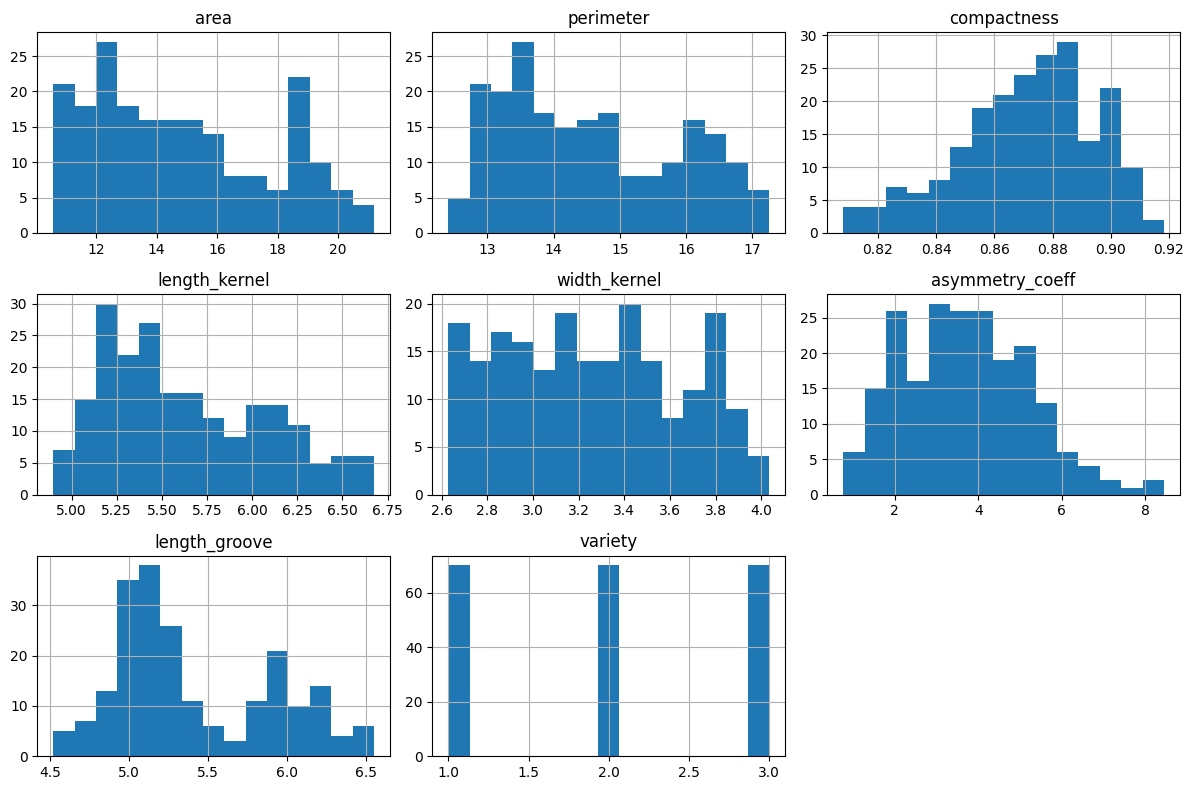

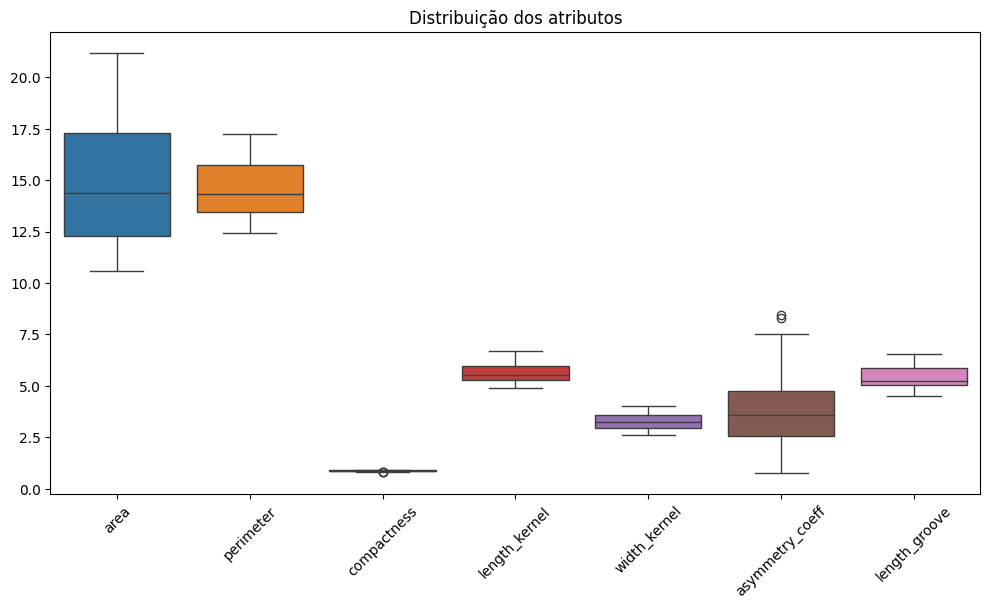

In [3]:
# Histogramas
df.hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=45)
plt.title("Distribuição dos atributos")
plt.show()


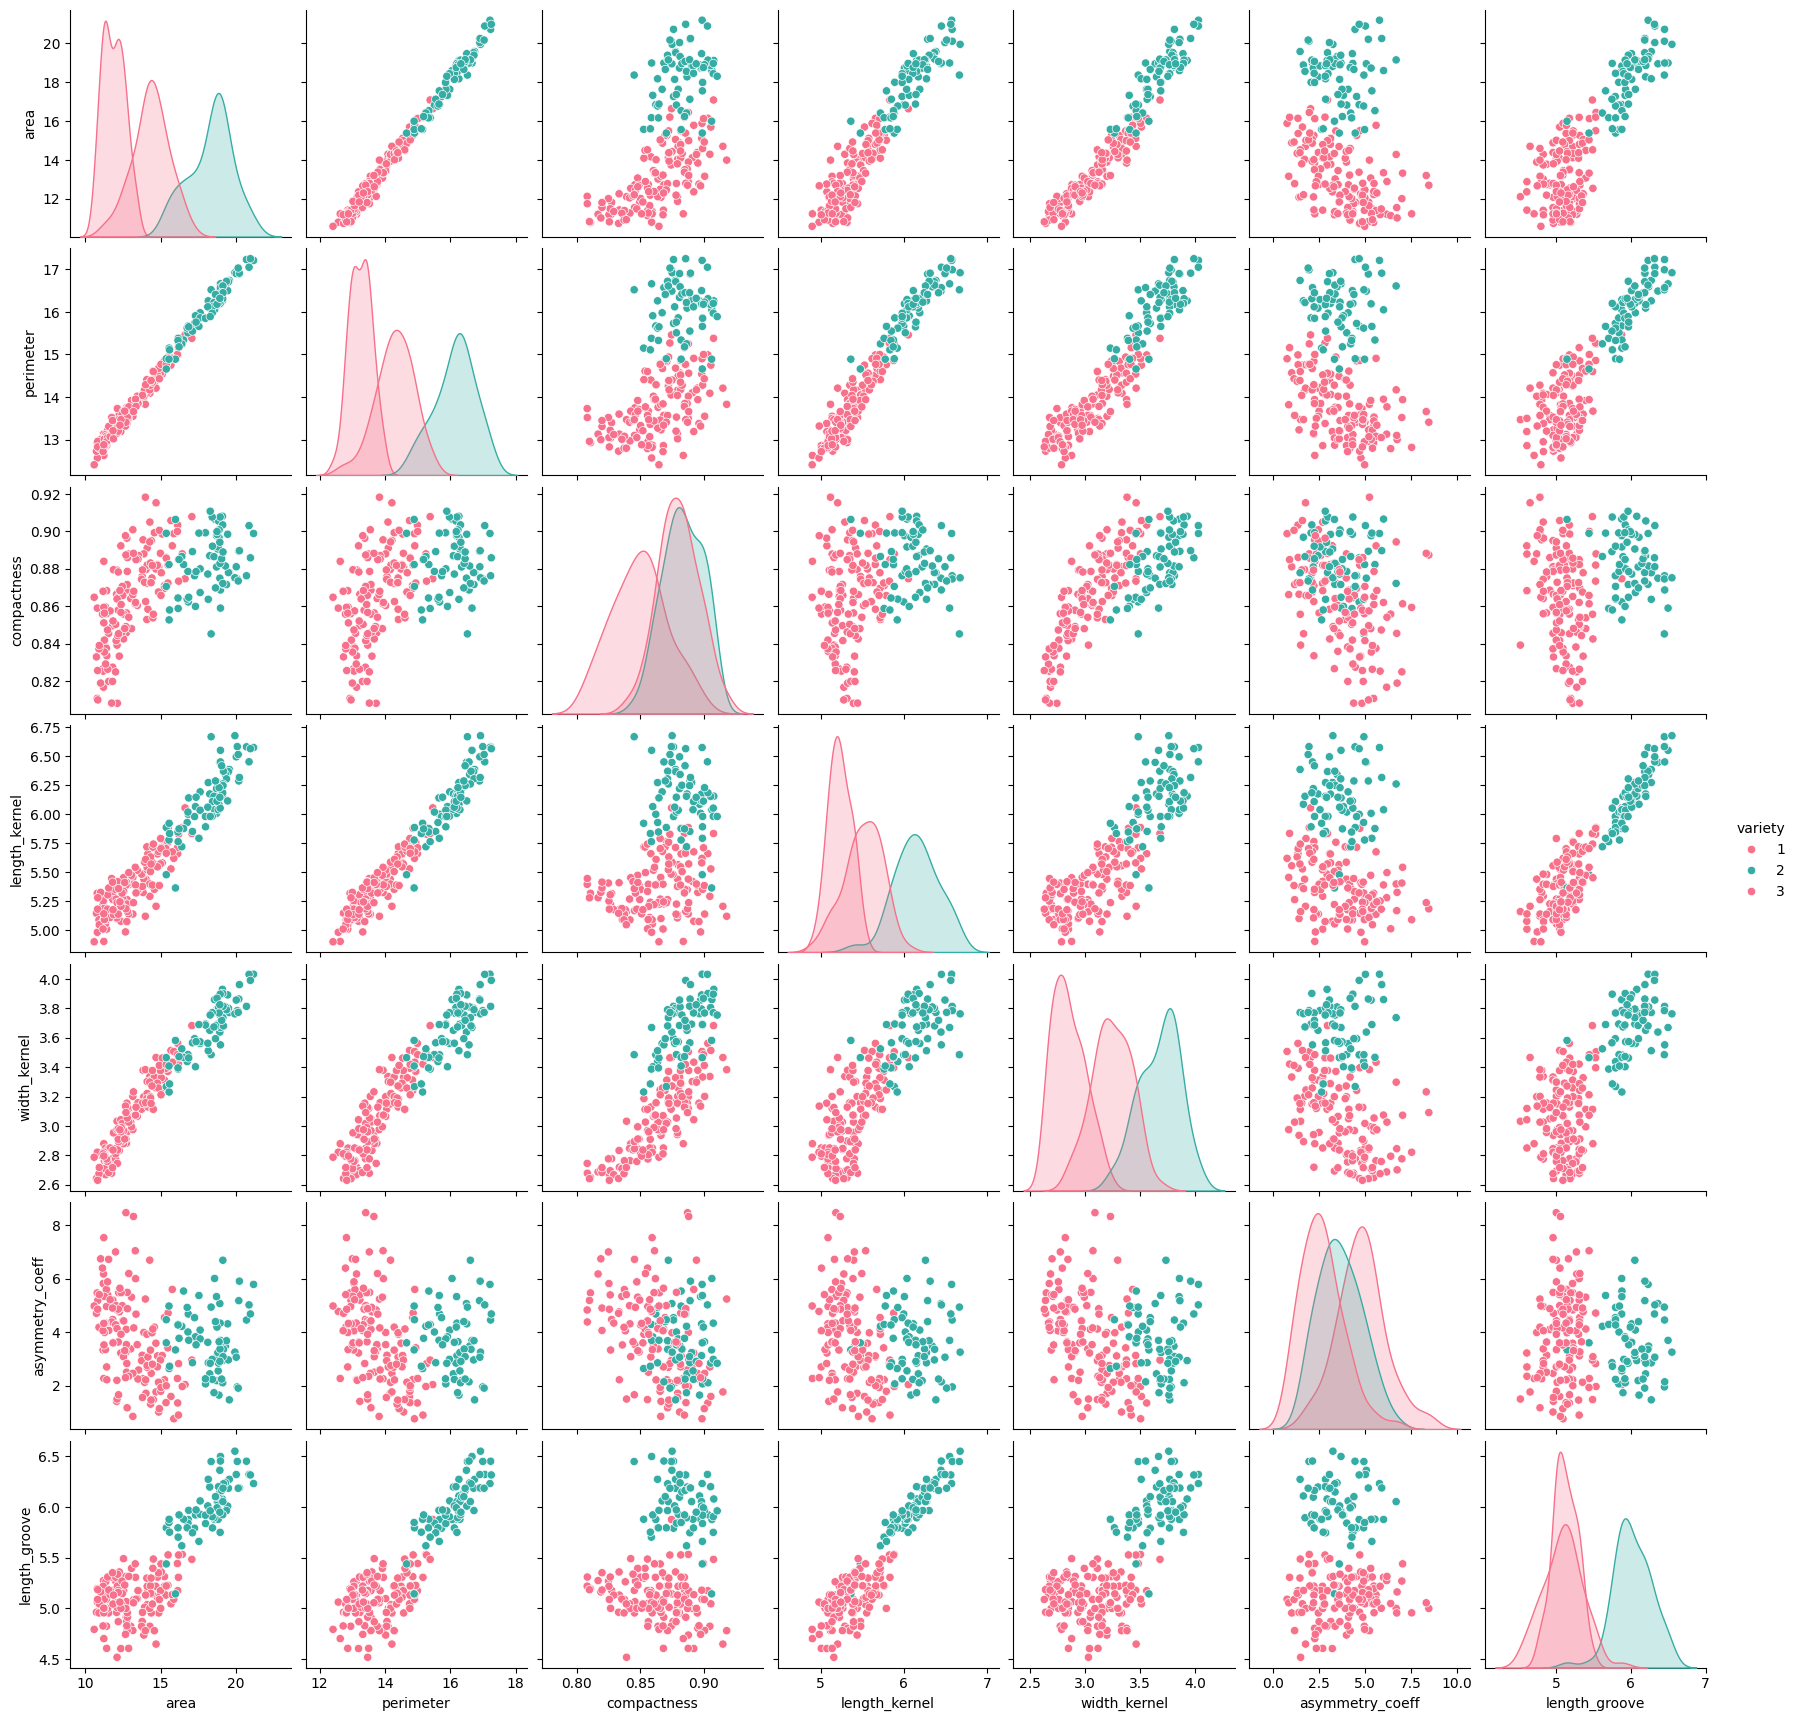

In [4]:
sns.pairplot(df, hue='variety', palette='husl')
plt.show()


In [5]:
print(df.isnull().sum())


area               0
perimeter          0
compactness        0
length_kernel      0
width_kernel       0
asymmetry_coeff    0
length_groove      0
variety            0
dtype: int64


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('variety', axis=1))
y = df['variety']


In [14]:
print(X[:5])


[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05  3.04218199e-01
   1.41701823e-01 -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 -1.68624664e-01
   1.97432229e-01 -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 -7.63637453e-01
   2.08047544e-01 -6.67479334e-01 -1.18919199e+00]
 [-3.47091272e-01 -4.75333162e-01  1.03938133e+00 -6.88978054e-01
   3.19508356e-01 -9.60817955e-01 -1.22998260e+00]
 [ 4.45257175e-01  3.30595037e-01  1.37450924e+00  6.66655647e-02
   8.05159035e-01 -1.56349549e+00 -4.75356297e-01]]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [17]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": acc,
        "report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"Modelo: {name}")
    print(f"Acurácia: {acc:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Modelo: KNN
Acurácia: 0.8730
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

Modelo: SVM
Acurácia: 0.8730
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

Modelo: Random Forest
Acurácia: 0.9206
Relatório de Classificação:
              precision    recall  f1-score   support

  

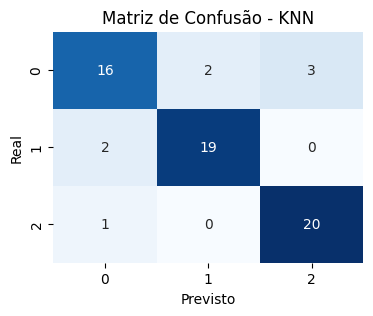

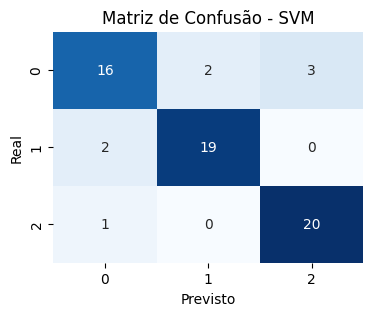

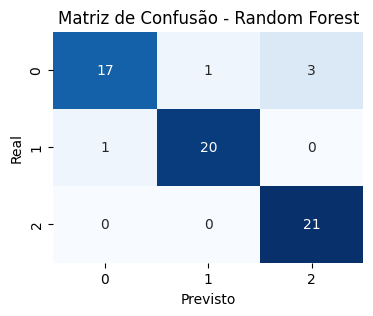

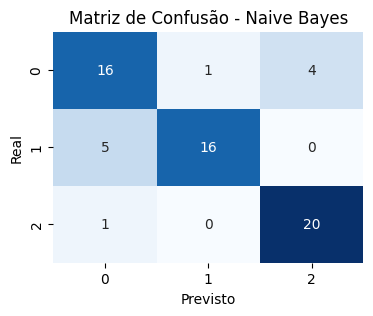

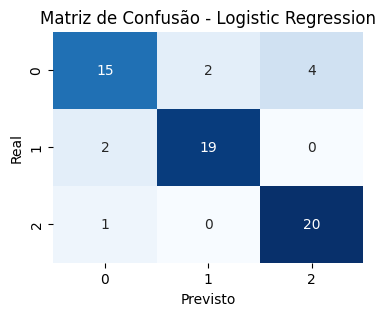

In [18]:
for name in results:
    cm = results[name]["confusion_matrix"]
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusão - {name}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV


In [20]:
param_grid_knn = {'n_neighbors': range(1, 21)}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print(f"Melhor parâmetro para KNN: {grid_knn.best_params_}")
print(f"Melhor acurácia no treino: {grid_knn.best_score_:.4f}")


Melhor parâmetro para KNN: {'n_neighbors': 1}
Melhor acurácia no treino: 0.9393


In [21]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print(f"Melhor parâmetro para SVM: {grid_svm.best_params_}")
print(f"Melhor acurácia no treino: {grid_svm.best_score_:.4f}")


Melhor parâmetro para SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Melhor acurácia no treino: 0.9731


In [22]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print(f"Melhor parâmetro para Random Forest: {grid_rf.best_params_}")
print(f"Melhor acurácia no treino: {grid_rf.best_score_:.4f}")


Melhor parâmetro para Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Melhor acurácia no treino: 0.9055


In [23]:
best_models = {
    "KNN Otimizado": grid_knn.best_estimator_,
    "SVM Otimizado": grid_svm.best_estimator_,
    "Random Forest Otimizado": grid_rf.best_estimator_
}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))



KNN Otimizado
Acurácia: 0.9048
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.89      0.81      0.85        21
           2       0.95      0.90      0.93        21
           3       0.88      1.00      0.93        21

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63


SVM Otimizado
Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.81      0.83        21
           2       0.95      0.86      0.90        21
           3       0.88      1.00      0.93        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63


Random Forest Otimizado
Acurácia: 0.8889
Relatório de Classificação:
              precision    recall  f1-score   su

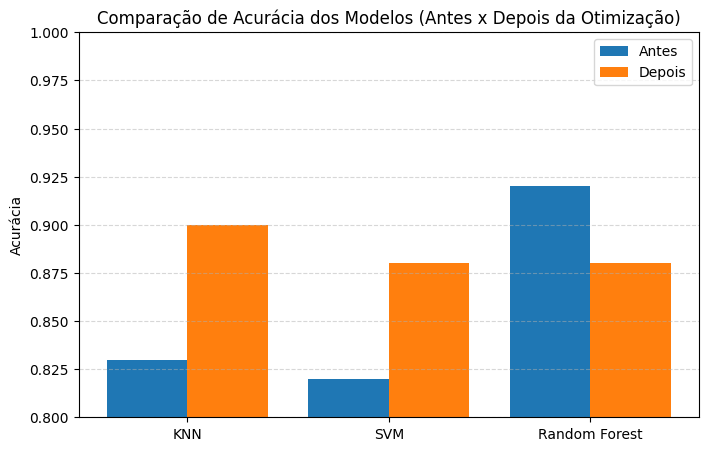

In [1]:
import matplotlib.pyplot as plt


model_names = ['KNN', 'SVM', 'Random Forest']
acc_before = [0.83, 0.82, 0.92]
acc_after = [0.90, 0.88, 0.88]

x = range(len(model_names))
plt.figure(figsize=(8, 5))
plt.bar(x, acc_before, width=0.4, label='Antes', align='center')
plt.bar([i + 0.4 for i in x], acc_after, width=0.4, label='Depois', align='center')
plt.xticks([i + 0.2 for i in x], model_names)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos (Antes x Depois da Otimização)')
plt.legend()
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
